<a href="https://colab.research.google.com/github/Atzingen/IA-FIC2021/blob/main/01_notebook_e_mnist_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 01 

Curso de Inteligência Artificial para tomada de decisões

Este notebook tem como objetivo mostrar um pouco da visualização dos dados e treinamento de modelos para classificação utilizando o dataset mnist e uma rede neural com o framewrok tensorflow. 

# Bibliotecas

In [1]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import cv2
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import datasets

# Como notebooks Funcionam

Mais informações nas referências abaixo:

* [Introdução Ao Jupyter Notebook](https://https://www.letscode.com.br/blog/introducao-ao-jupyter-notebook)

* [Site do Jupyter Notebook](https://jupyter.org/)

* [Anaconda](https://www.anaconda.com/products/individual-d)

* [Google Colab](https://colab.research.google.com/)

In [2]:
nome = 'Gustavo'
idade = 30
print(f"Meu nome é {nome} e eu tenho {idade} anos.")

Meu nome é Gustavo e eu tenho 30 anos.


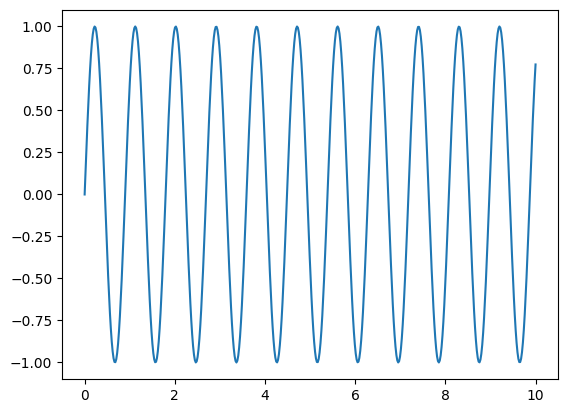

In [3]:
t = np.linspace(0, 10, 500)
y = np.sin(7*t)
plt.plot(t, y)

In [4]:
px.line(t, x=t, y=y, labels={'x': 'Tempo', 'y': 'Seno'}, title='Gráfico de Seno')

In [5]:
(x_train, y_train_raw), (x_test, y_test_raw) = datasets.mnist.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
y_train_raw.shape

(60000,)

In [8]:
print(y_train_raw[:5])

[5 0 4 1 9]


In [9]:
x_train[0].shape

(28, 28)

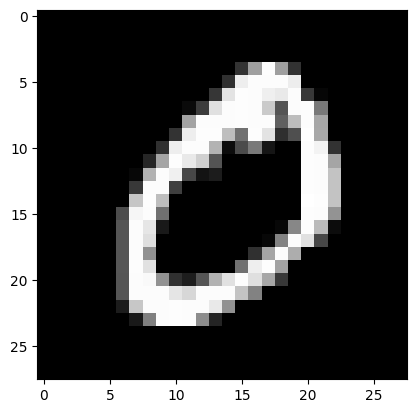

In [10]:
plt.imshow(x_train[1], cmap='gray')

In [11]:
@interact(index=0)
def plot_image(index):
    plt.imshow(x_train[index], cmap='gray')
    plt.title(f"Label: {y_train_raw[index]}")
    plt.show()

interactive(children=(IntSlider(value=0, description='index', max=1), Output()), _dom_classes=('widget-interac…

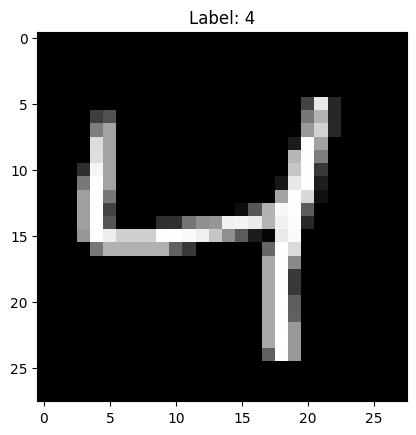

In [12]:
plot_image(2)

# Mnist Dataset

* Vizualização do formato dataset
* Formato e conversão dos labels (one hot array)
* Plot das imagens dos dígitos - plotly express e interact
* Normalização e reshape dos dados

In [13]:
input_shape = (28, 28, 1)

x_train = x_train/255.0
x_test = x_test/255.0

y_train = tf.keras.utils.to_categorical(y_train_raw, 10)
y_test = tf.keras.utils.to_categorical(y_test_raw, 10)

In [14]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

# Modelo de Rede Neural com tensorflow e keras

In [15]:
model = tf.keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

c:\Users\Gustavo\miniconda3\envs\tf\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss="categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])

In [18]:
model.fit(x_train, 
         y_train, 
         epochs=10, 
         batch_size=32, 
         validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9205 - loss: 0.2827 - val_accuracy: 0.9548 - val_loss: 0.1564
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9628 - loss: 0.1261 - val_accuracy: 0.9635 - val_loss: 0.1242
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9742 - loss: 0.0876 - val_accuracy: 0.9708 - val_loss: 0.0970
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9803 - loss: 0.0659 - val_accuracy: 0.9723 - val_loss: 0.0909
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9851 - loss: 0.0499 - val_accuracy: 0.9754 - val_loss: 0.0854
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9885 - loss: 0.0393 - val_accuracy: 0.9749 - val_loss: 0.0871
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9899 - loss: 0.0323 - val_accuracy: 0.9743 - val_loss: 0.0902
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9928 - loss: 0.0247 - 

In [19]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.9780 - loss: 0.0811


[0.08107611536979675, 0.9779999852180481]

# Validação do modelo treinado

In [ ]:
# Check if running in Colab or local environment
try:
  import google.colab
  IN_COLAB = True
except ImportError:
  IN_COLAB = False

if IN_COLAB:
  # Use the take_photo function for Colab
  from IPython.display import Image
  try:
    filename = take_photo()
    print('Saved to {}'.format(filename))
    display(Image(filename))
  except Exception as err:
    print(str(err))
else:
  cap = cv2.VideoCapture(0)
  ret, frame = cap.read()
  
  if ret:
    filename = 'captured_image.jpg'
    cv2.imwrite(filename, frame)
    cap.release()
    print(f'Image captured and saved as {filename}')
    
    plt.figure(figsize=(6, 6))
    img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title('Captured Image')
    plt.axis('off')
    plt.show()
  else:
    print("Failed to capture image from webcam")
    cap.release()


In [28]:
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = cv2.resize(img, (28, 28))
img = img/255.0
img = np.expand_dims(img, axis=0)
img=img.reshape(img.shape[0], img.shape[1], img.shape[2], 1)

In [29]:
resultado_one_hot = model.predict(img)
print(resultado_one_hot, np.argmax(resultado_one_hot))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[1.0002665e-13 2.9083283e-17 7.4381227e-08 8.7467635e-01 1.3917018e-29
  6.7333460e-08 1.2532343e-01 1.8875015e-08 6.7413389e-08 3.0141320e-15]] 3
